# Basic Analysis to understand the dataset
1-- WHo sends the most number of emails to whom?
2-- Which year and month has the most number of mails?

In [4]:
import email
import string
import operator
import os
from os import listdir
from os.path import isfile, join
from glob import glob
from email.parser import Parser
import os
import email.utils
import datetime
from dateutil.parser import parse
import time
import matplotlib.pyplot as plt
#plt.style.use('presentation')
from pylab import rcParams

In [8]:
import os
os.chdir("D:")
a=os.getcwd()
path= a+"enron_mail_20150507/maildir"
print(path)
#pathprint(path)

D:\enron_mail_20150507/maildir


# To find out who Contacted which employee the most:

In [10]:
for a in glob(path+'\\*')[:5]:                                               #using the absolute path to loop over files
    counting_mails = {'user':a, 'mails':{}}                                  
    for subdirs, dirs, files in os.walk(a):                                  #looping over directories, subdirectories and files
        for b in files:
            try:
                response = open(os.path.join(subdirs, b),'r', errors = 'ignore')
                fp=Parser().parsestr(response.read())                        #reading the files using parser function
            except:
                print('error',os.path.join(subdirs, b))               
            for to_mails in str(fp['to']).split(","):                        #splitting the email at , to get the TO from mails
                if(to_mails.strip() in counting_mails["mails"]):
                    counting_mails["mails"][to_mails.strip()] = counting_mails["mails"][to_mails.strip()] + 1
                else:
                    counting_mails["mails"][to_mails.strip()] = 1
    sorted_characters = sorted(counting_mails["mails"].items(), key=operator.itemgetter(1), reverse = True) # sorting the dict based on frequency
    print('Name of Employee: ',counting_mails['user'].split("\\")[-1].upper())
    for employees in sorted_characters[:5]:
        print("\t",employees)



Name of Employee:  ALLEN-P
	 ('keith.holst@enron.com', 220)
	 ('mike.grigsby@enron.com', 216)
	 ('pallen@enron.com', 195)
	 ('ina.rangel@enron.com', 160)
	 ('stagecoachmama@hotmail.com', 153)
Name of Employee:  ARNOLD-J
	 ('john.arnold@enron.com', 603)
	 ('mike.maggi@enron.com', 278)
	 ('ina.rangel@enron.com', 241)
	 ('jennifer.fraser@enron.com', 211)
	 ('dutch.quigley@enron.com', 186)
Name of Employee:  ARORA-H
	 ('harry.arora@enron.com', 353)
	 ('harora@ect.enron.com', 34)
	 ('robert.stalford@enron.com', 30)
	 ('suresh.raghavan@enron.com', 29)
	 ('steve.wang@enron.com', 28)
Name of Employee:  BADEER-R
	 ('20participants@caiso.com', 201)
	 ('robert.badeer@enron.com', 190)
	 ('tim.belden@enron.com', 123)
	 ('jeff.richter@enron.com', 99)
	 ('None', 81)
Name of Employee:  BAILEY-S
	 ('susan.bailey@enron.com', 223)
	 ('stephanie.panus@enron.com', 64)
	 ('sara.shackleton@enron.com', 61)
	 ('samantha.boyd@enron.com', 55)
	 ('marie.heard@enron.com', 39)


In [11]:
######### To analyze when do the employees receive most number of EMAILS ###################################
inbox=[]
date_frequency = {}

for filename in os.listdir(path):                                     #looping over files to read them
    for a in os.listdir(path+'/'+filename):                           #adding the filenames to the path
        if (a=='inbox')or(a=='notes_inbox'): 
            for b in os.listdir(path+'/'+filename+'/'+a):             #adding files in filenames
                abstract_path=path+'/'+filename+'/'+a+'/'+b
                try:
                    file_reader = open(abstract_path, "r")
                    string_reader = file_reader.read()
                    email_reader = Parser().parsestr(string_reader)
                    date_time = parse(email_reader['date'])             
                    cleaning_mmyy=(date_time.strftime('%m/%Y'))
                    if cleaning_mmyy not in date_frequency:  
                        date_frequency[cleaning_mmyy] = 1
                    else: date_frequency[cleaning_mmyy]+=1 
                except Exception:
                    pass

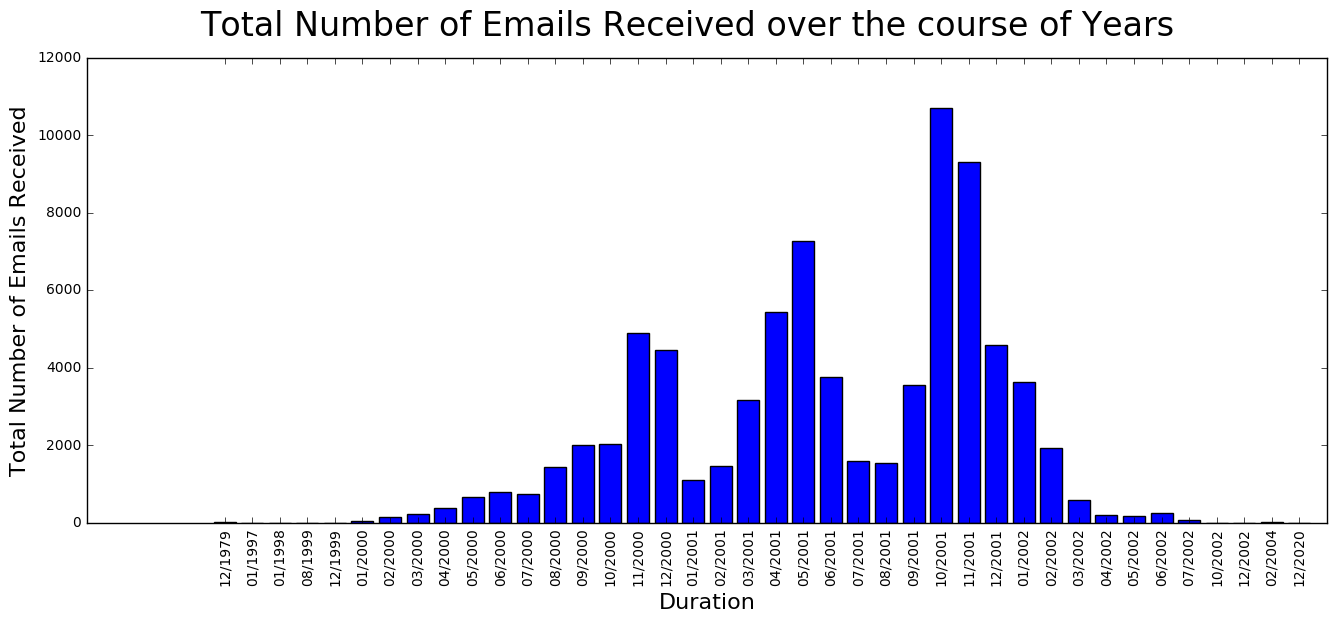

In [17]:
rcParams['figure.figsize'] = 16, 6

fig = plt.figure()
fig.suptitle('Total Number of Emails Received over the course of Years', fontsize=24)
plt.xlabel('Duration', fontsize=16)
plt.ylabel('Total Number of Emails Received', fontsize=16)
plt.bar(range(len(date_frequency)), [v[1] for v in sorted(date_frequency.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))], align='center')
plt.xticks(range(len(date_frequency)), [v[0] for v in sorted(date_frequency.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))],rotation='vertical')

plt.show()

## Conclusion:
The maximum number of emails were received between October 2001 to November 2001. After research I came to know it was during this time the Enron reports its first quarterly loss in over four years after taking charges of $1 billion on poorly performing businesses. AFter this the decline of ENRON started!!!